# **LINEAR REGRESSION PROJECT** 

**How do you know how many calories did you burn**? 





This model predicts the correlation between the exercise, body type and calories burned with respect to the heart rate and duration of the exercise.


**Kaggle Dataset:** https://www.kaggle.com/datasets/fmendes/fmendesdat263xdemos






# What is Linear Regression?
- A supervised learning algorithm which predicts a output value based on single/multiple input values. 
- it works on the equation, Y=mX+C   where Y is the dependent variable/output
                                     m is the slope of the line
                                     X is the independent variable/input
                                     C is the intercept of the line.

## Importing important Libraries 

In [1]:
#to import files
from google.colab import files

#for data manipulation
import numpy as np
import pandas as pd

#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

#for splitting dataset and training of model and prediction
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#for model evalulation
from sklearn.metrics import accuracy_score,mean_absolute_error, r2_score

import warnings

Just to ignore all the warnings, chillx!

In [2]:
warnings.filterwarnings("ignore")

# Uploading the Calories dataset.

About the dataset: The data has been collected from 15000 different people and gives the number of calories they burned.

In [3]:
upload1= files.upload()

Saving calories.csv to calories.csv


In [4]:
calories= pd.read_csv('calories.csv')
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


## Uploading the exercise dataset

About the dataset: This dataset gives us information about 15000 males and females of different ages who performed exercises for different duration. Important features like weight, height and body temperature is provided to find out the exact correlation between exercise and calories burned.

In [5]:
upload2 = files.upload()

Saving exercise.csv to exercise.csv


In [6]:
exercise = pd.read_csv('exercise.csv')
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


## Combining the two datasets i.e calories dataset and exercise dataset

In [7]:
calories_data = pd.concat([exercise, calories['Calories']],axis=1)
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


## Data Preprocessing

In [8]:
calories_data.shape   #we have 15000 people and 9 features for them

(15000, 9)

### Fetching some information about our dataset

In [9]:
calories_data.info()  #no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


**Inference:**
* 2 columns have integer type values
* 1 column has text values 
* 6 columns have float values

### Searching for missing values in the dataset

In [10]:
calories_data.isnull().sum()     #no missing values

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

### Analysing the data

We obtain the number of values in each column, mean of values, standard deviation, minimum and maximum values for each column.

In [11]:
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


### Changing the gender value (text) to numerical value.

This is done to change categorical features into numerical dummy features useful for training machine learning model.

Replacing male with 0 and female with 1

In [12]:
calories_data.replace({'Gender': {'male':0,'female':1}},inplace=True)     #using inplace=True is used for a permanent change
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


## Data Visualisation 

In [13]:
sns.set()

### Gender

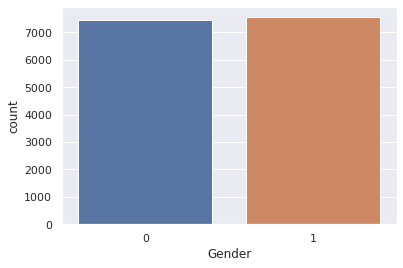

In [14]:
sns.countplot(calories_data['Gender'])   #count plot only for categorical columns

**Inference:**
* Equal number of males and females

### Age

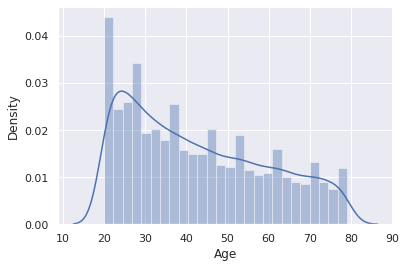

In [15]:
sns.distplot(calories_data['Age'])

**Inference**:  

*   Maximum people are of 20 years.
*   Number of people decreasing as the age increases.



### Height

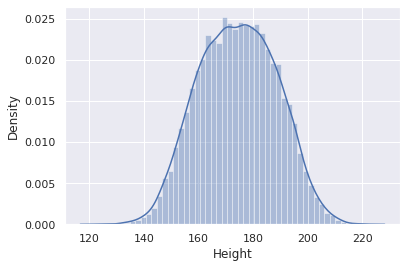

In [16]:
sns.distplot(calories_data['Height'])

**Inference**: 
 

*    Gaussian distribution or a bell type distribution 
*    Maximum height = 222cm



### Weight

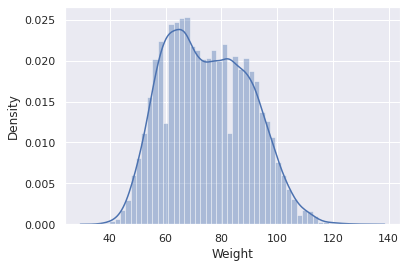

In [17]:
sns.distplot(calories_data['Weight'])

**Inference**:  

*    Bimodal distribution curve (2 spikes)
*    Maximum people have weights around 74kgs and 87kgs.



### Correlation plot 

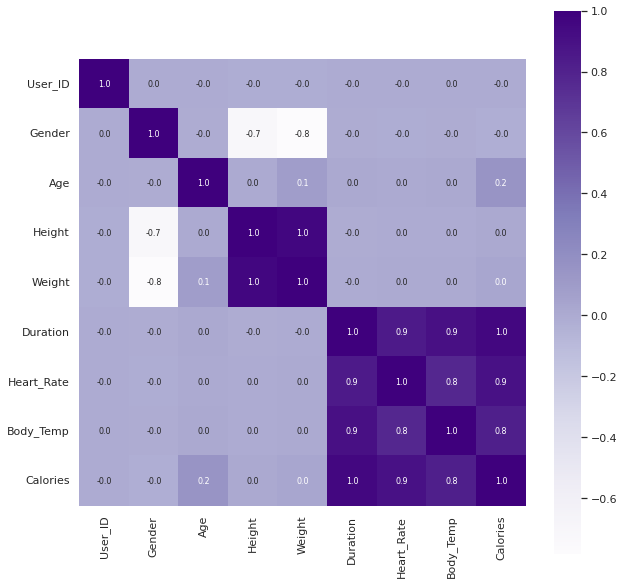

In [18]:
correlation = calories_data.corr()

plt.figure(figsize=(10,10))
sns.heatmap(correlation , cbar=True ,square=True , fmt='.1f' , annot=True , annot_kws={'size':8} , cmap='Purples')

**Inference**:

Looking at correlations through heatmap -

1. *Positive correlation* - suppose if the duration of the exercise increases and the calories burned also inccreases then both are in the same direction, so this is a positive correlation.

2. *Negative correlation* - suppose if the duration of the exercise increases but the calories burned decreases or vice versa then both are in opposite direction, so this would be a negative correlation.

## Model Building and Training

### Separating the target values and the features

In [19]:
x = calories_data.drop(columns=['User_ID','Calories'],axis=1)     #dropping columns: user id and calories
y = calories_data['Calories']                                     #setting calories as the target value

### Features

In [20]:
x

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,0,68,190.0,94.0,29.0,105.0,40.8
1,1,20,166.0,60.0,14.0,94.0,40.3
2,0,69,179.0,79.0,5.0,88.0,38.7
3,1,34,179.0,71.0,13.0,100.0,40.5
4,1,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...
14995,1,20,193.0,86.0,11.0,92.0,40.4
14996,1,27,165.0,65.0,6.0,85.0,39.2
14997,1,43,159.0,58.0,16.0,90.0,40.1
14998,0,78,193.0,97.0,2.0,84.0,38.3


### Target values

In [21]:
y

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64

### Spitting the dataset into Training set and Test set. 


We will set the test size to 0.2 which means that we will train 80% of dataset and we will test our predictions on 20% of the data.

In [22]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [23]:
print(x.shape , x_train.shape , x_test.shape)

(15000, 7) (12000, 7) (3000, 7)


In [24]:
print(y.shape , y_train.shape , y_test.shape)

(15000,) (12000,) (3000,)


### Training the Linear Regression model on the dataset.

In [25]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

### For visualisation purposes, we will be slicing the dataset from 15000 rows to 200 rows

In [26]:
sliced_dataset= calories_data.loc[1:200,:]
sliced_dataset


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0
5,15130815,1,36,151.0,50.0,23.0,96.0,40.7,123.0
...,...,...,...,...,...,...,...,...,...
196,11267944,1,73,158.0,57.0,29.0,103.0,40.9,193.0
197,19795364,0,27,180.0,86.0,24.0,107.0,40.7,147.0
198,14290814,0,66,171.0,72.0,18.0,105.0,40.5,133.0
199,19222644,0,39,199.0,104.0,26.0,101.0,40.7,161.0


### A 3-D plot between duration , heart rate and calories burned.

In [27]:
figure= px.scatter_3d(sliced_dataset, x='Duration', y='Heart_Rate', z='Calories')
fig = plt.figure(figsize=(20,20))

figure.show()


<Figure size 1440x1440 with 0 Axes>

**Inference:**
* As the duration and heart rate increases, the number of calories burned also increases.

## Prediction

Let's check our model on the test data

In [28]:
test_data_prediction = model.predict(x_test)
test_data_prediction

array([137.49241057, 182.18166512,  50.15864741, ..., 157.56637167,
        16.54924422, 100.21047087])

### Building a Predictive System:   
This predictive system of the model takes input features given by the user and gives us the amount of calories burned by the person.

In [33]:
def prediction():
  
  input_data = [0,68,190,94.0,29.0,105.0,40.8]

  X_new = np.asarray(input_data)

  X_new = X_new.reshape(1,-1)

  Y_pred = model.predict(X_new)

  print('\nThe amount of Calories burned are: ', Y_pred)

prediction()


The amount of Calories burned are:  [199.38038663]


## Model Evaluation

### Model Accuracy

In [30]:
accuracy=model.score(x_train,y_train)

print('Accuracy of the model:',accuracy*100,'%')

Accuracy of the model: 96.72762198112508 %


**Inference:**
* The model is highly accurate.

The aim of a Linear Regression model is to create a best fit line in the model and we can predict the accuracy of the model with respect to the line. 

So, of course, the points that are away from the best fit line have some errors. 

This lack of accuracy of the model can be calculated by MAE - Mean Absolute Error and R2 score

In [31]:
print('MAE: ',mean_absolute_error(y_test,test_data_prediction))

MAE:  8.385188053147187


In [32]:
print('r2 score: ',r2_score(y_test,test_data_prediction))

r2 score:  0.9668790377181355
